In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

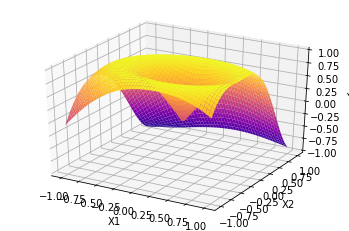

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

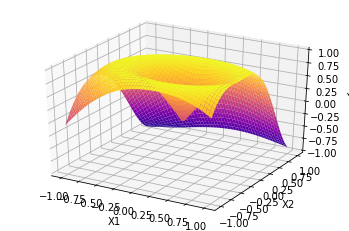

In [3]:
%matplotlib tk

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
# ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Using Neural Network

In [84]:
n_hidden = 1
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)

# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [85]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.6072739093548886


100 Error =  0.07472471800178293


200 Error =  0.04515361099870846


300 Error =  0.039739014016865616


400 Error =  0.03864425465128864


500 Error =  0.03843036427547214


600 Error =  0.038404983972325876


700 Error =  0.0384025179113251


800 Error =  0.038402435563743335


900 Error =  0.038402433817081416


1000 Error =  0.03840243379451333


1100 Error =  0.03840243379434344


1200 Error =  0.038402433794342744


1300 Error =  0.038402433794342744


1400 Error =  0.038402433794342744


1500 Error =  0.03840243379434274


1600 Error =  0.038402433794342744


1700 Error =  0.038402433794342744


1800 Error =  0.038402433794342744


1900 Error =  0.038402433794342744


TclError: invalid command name "pyimage94"

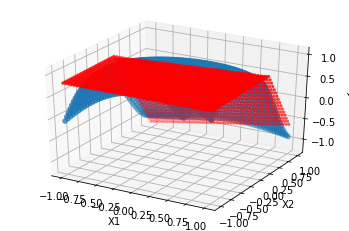

In [86]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [87]:
error = (dy**2).mean()
error_list = [error,]
pre_err = error

# Repeat steps below to add new neuron to the network

In [88]:
from copy import deepcopy

### Adding new neurons at some point with zero output 

In [102]:
noise_new = 0.0
noise_old = 0.1
noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1.weights.shape)
noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1.bias.shape)

layer1c = deepcopy(layer1)
layer2c = deepcopy(layer2)

l1_add = tnn.LinearLayer(2, 1, optimizer=optimizer)
l2_add = tnn.DoubleReluLinearLayer(1, 1, optimizer=optimizer)

new_w1 = np.hstack([layer1.weights+noise_old_w1, l1_add.weights])
new_b1 = np.hstack([layer1.bias+noise_old_b1, l1_add.bias])

i, o = layer2.weights.shape
i_, o_ = l2_add.weights.shape
new_w2_ = np.concatenate([layer2.weights.reshape(2,i//2,o),
                          l2_add.weights.reshape(2,i_//2,o_)*noise_new],
                         axis=1)
new_w2 = new_w2_.reshape(-1, o)
new_b2 = deepcopy(layer2.bias)

## Creating a new network with added neuron

In [103]:
## creating new network with added neuron
optimizer = tnn.Adam()
# n_hidden = 2
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden,
                             weights=new_w1, bias=new_b1,
                             optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1,
                          weights=new_w2, bias=new_b2,
                          optimizer=optimizer)

In [104]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.024843329733557237


100 Error =  0.011675693456145162


200 Error =  0.011504089048630107


300 Error =  0.011504091721385647


400 Error =  0.011504213941368009


500 Error =  0.011505040917943117


600 Error =  0.011505240727004179


700 Error =  0.011528955867258465


800 Error =  0.0115041229265492


900 Error =  0.01151137720969573


1000 Error =  0.011504925864215053


1100 Error =  0.011504877831419253


1200 Error =  0.011518605740380449


1300 Error =  0.011508384918585511


1400 Error =  0.011510233063930545


1500 Error =  0.011507795693818249


1600 Error =  0.011504117633215965


1700 Error =  0.011505529292006862


1800 Error =  0.011510401439914119


1900 Error =  0.011509798860810043


2000 Error =  0.011505009948197404


2100 Error =  0.011504124695323992


2200 Error =  0.011505643891997985


2300 Error =  0.011504107835460025


TclError: invalid command name "pyimage140"

In [105]:
pre_err - error   ### ---> the more the better

0.006968675994918837

In [106]:
pre_err = error
error_list.append((dy**2).mean())

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

#### If the additional neuron was not helpful, reset the network

In [ ]:
### rest if the neuron added is not good enough
layer1 = deepcopy(layer1c)
layer2 = deepcopy(layer2c)

#### Total number of neurons

In [107]:
n_hidden = len(layer1.bias)
n_hidden

5

### Plot the independent non-linear units (neurons)

In [ ]:
outs = []
for i in range(len(layer1.bias)):
    out = layer2.zee[:, i]*layer2.weights[i] + layer2.zee[:, i+n_hidden]*layer2.weights[i+n_hidden]
    outs.append(out)

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')

for i, out in enumerate(outs):
    ax.scatter(X1, X2, out.reshape(-1), color='g', marker='.', label=f'X,y_{i}')
#     plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')
    
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [ ]:
%matplotlib inline
plt.plot(error_list)

### Training the same network end to end

In [ ]:
## creating new network with added neuron
optimizer = tnn.Adam()
net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)
# layer1_ = tnn.NonLinearLayer(2, n_hidden, activation=tnn.Relu(), optimizer=optimizer)
# layer2_ = tnn.LinearLayer(n_hidden, 1, optimizer=optimizer)

In [ ]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net_.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net_.backward(dy)
    
    net_.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Normalizing the weights

#### analsying weights

In [108]:
layer1.weights

array([[ 7.13131605e-01, -8.27854559e-01, -1.35480855e+00,
        -7.32399206e-01,  1.28783247e+00],
       [ 1.34938168e+00,  1.19543727e+00, -2.59696423e-03,
         2.79992705e+00,  1.06582603e+00]])

In [109]:
# norms = np.linalg.norm(layer1.weights, ord=2, axis=0, keepdims=True)
norms = np.linalg.norm(layer1.weights, ord=2, axis=0)
norms ### none of the neurons has magnitude(norm) = 1

array([1.52623314, 1.45410228, 1.35481104, 2.89413201, 1.67167509])

In [110]:
w1_norm = layer1.weights/norms.reshape(1,-1)
w1_norm

array([[ 0.46724946, -0.56932347, -0.99999816, -0.25306351,  0.77038444],
       [ 0.88412553,  0.82211361, -0.00191685,  0.96744967,  0.63757966]])

#### analysing bias

In [111]:
layer1.bias

array([-0.61048018,  0.59081809, -0.50105878, -0.48178595, -0.12948161])

In [112]:
b1_norm = layer1.bias/norms
# b1_norm = (1-norms)*(layer1.input@layer1.weights).sum(axis=0)
b1_norm

array([-0.39999143,  0.40631123, -0.36983666, -0.16646993, -0.0774562 ])

##### analysing second weights

In [113]:
layer2.weights

array([[-1.34817175],
       [-0.08453473],
       [-0.75598664],
       [-0.5345323 ],
       [ 0.66649649],
       [-0.04614962],
       [-1.07422047],
       [ 0.35480007],
       [ 0.27037743],
       [-0.19423416]])

In [114]:
w2p, w2n = np.split(layer2.weights, 2)
w2p = w2p*norms.reshape(-1,1)
w2n = w2n*norms.reshape(-1,1)
w2_norm = np.vstack([w2p, w2n])
w2_norm

array([[-2.0576244 ],
       [-0.12292215],
       [-1.02421904],
       [-1.54700705],
       [ 1.11416558],
       [-0.07043508],
       [-1.56202644],
       [ 0.48068705],
       [ 0.78250796],
       [-0.32469641]])

### verifying the validity of normalization

In [115]:
# layer1.output

In [116]:
# (layer1.input@w1_norm + b1_norm)

In [117]:
# layer1.output-(layer1.input@w1_norm + b1_norm)

### Constructing NN from normalized parameters

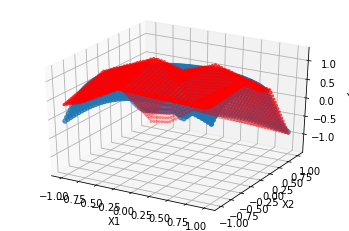

In [118]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden,
                             weights=w1_norm, bias=b1_norm,
                             optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, 1,
                          weights=w2_norm, bias=layer2.bias,
                          optimizer=optimizer)
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

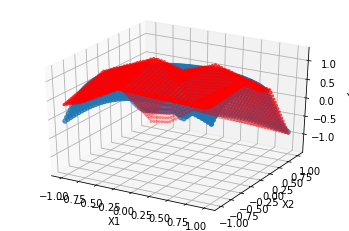

In [119]:
yout = net.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [120]:
np.abs(yout - yout_).sum()

3.1097346919750635e-13

In [121]:
((yout - yy)**2).mean(), ((yout_ - yy)**2).mean() ## there is no change in error..

(0.011504077600100636, 0.011504077600100634)